In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv('data/fandango_scrape.csv')

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

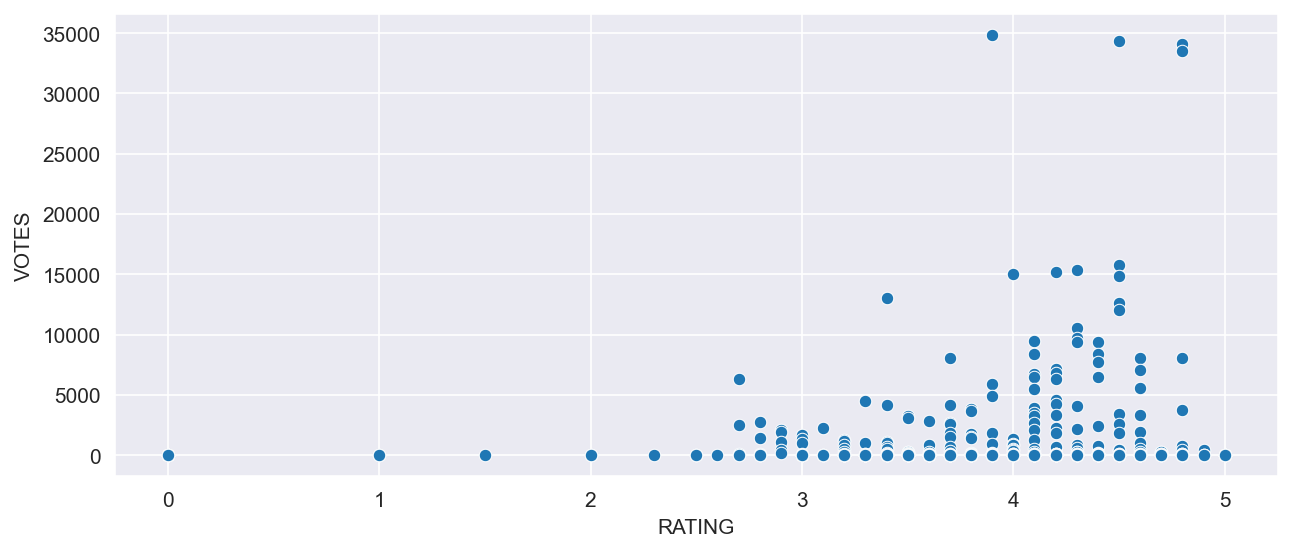

In [7]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')

In [9]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [10]:
fandango["YEAR"] = fandango["FILM"].apply(lambda title: title.split("(")[-1].replace(")", ""))

In [11]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [12]:
fandango["YEAR"].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

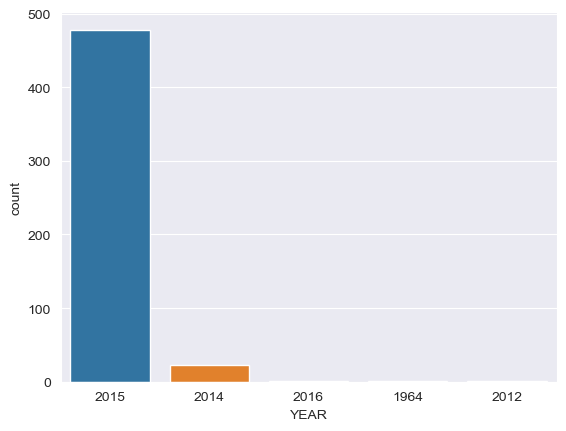

In [14]:
sns.countplot(data=fandango, x='YEAR', hue="YEAR")

In [15]:
fandango.nlargest(10,"VOTES")

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [16]:
no_votes = fandango["VOTES"]==0

In [17]:
no_votes.sum()

69

In [18]:
fan_reviews = fandango[fandango["VOTES"]>0]

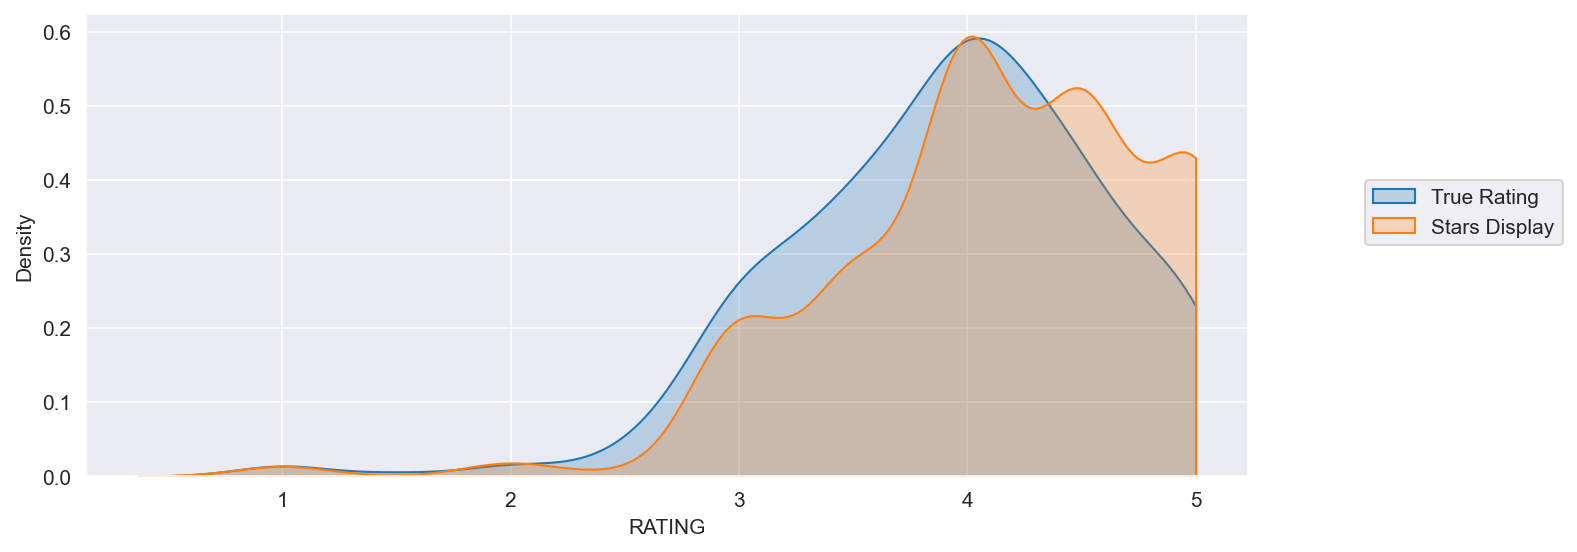

In [25]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviews, x="RATING",clip=[0,5],fill=True,label="True Rating")
sns.kdeplot(data=fan_reviews, x="STARS",clip=[0,5],fill=True,label="Stars Display")
plt.legend(loc=(1.1,0.5))

In [26]:
fan_reviews["STARS_DIF"] = fan_reviews["STARS"]-fan_reviews["RATING"]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25984\3419992980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviews["STARS_DIF"] = fan_reviews["STARS"]-fan_reviews["RATING"]


In [28]:
fan_reviews["STARS_DIF"] = fan_reviews["STARS_DIF"].round(1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25984\864828734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviews["STARS_DIF"] = fan_reviews["STARS_DIF"].round(1)


In [29]:
fan_reviews.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<Axes: xlabel='STARS_DIF', ylabel='count'>

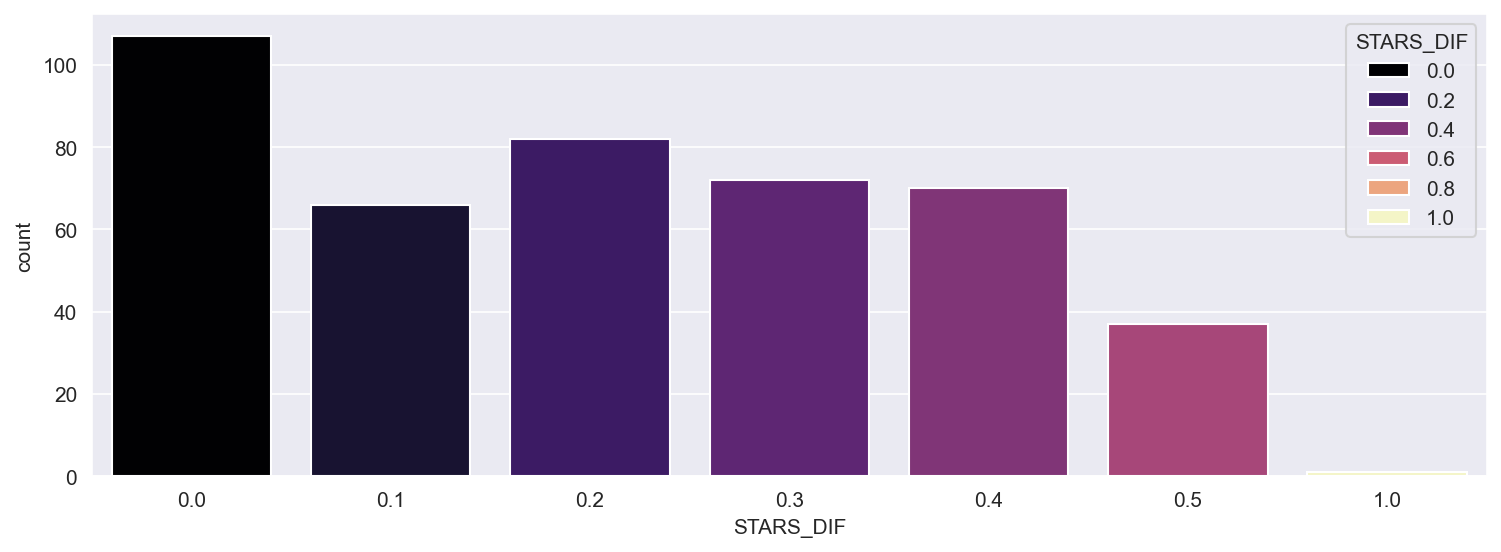

In [31]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_reviews, x="STARS_DIF", hue="STARS_DIF",palette="magma")

In [34]:
fan_reviews[fan_reviews["STARS_DIF"]==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [35]:
all_sites = pd.read_csv('data/all_sites_scores.csv')

In [36]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [37]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [38]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

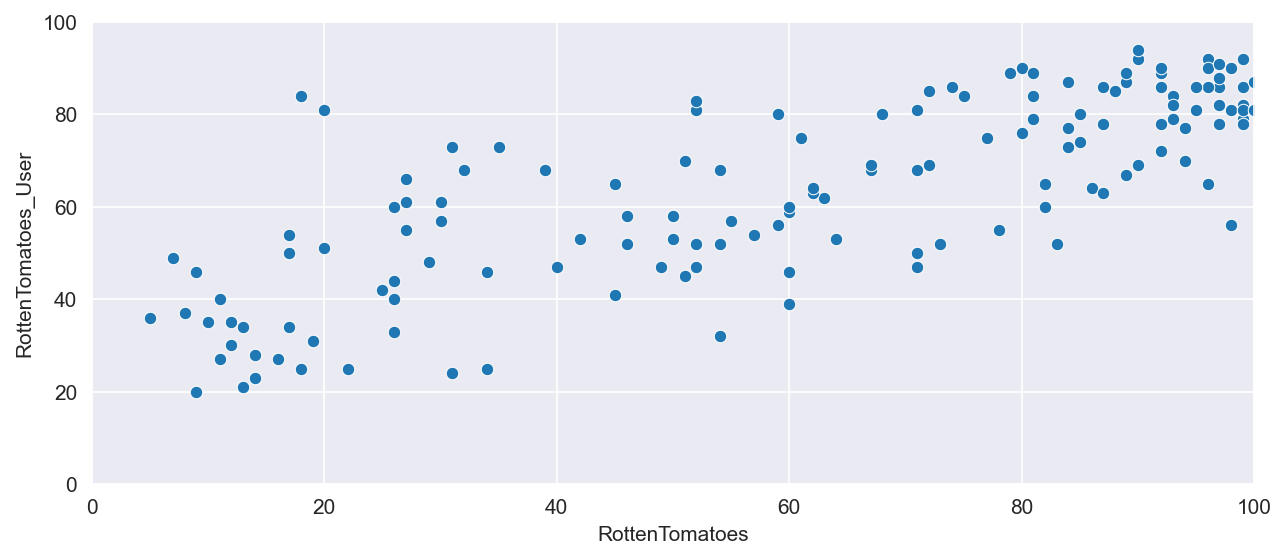

In [40]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

In [41]:
all_sites["Rotten_Diff"] = all_sites["RottenTomatoes"]-all_sites["RottenTomatoes_User"]

In [42]:
all_sites["Rotten_Diff"].apply(abs).mean()

15.095890410958905

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

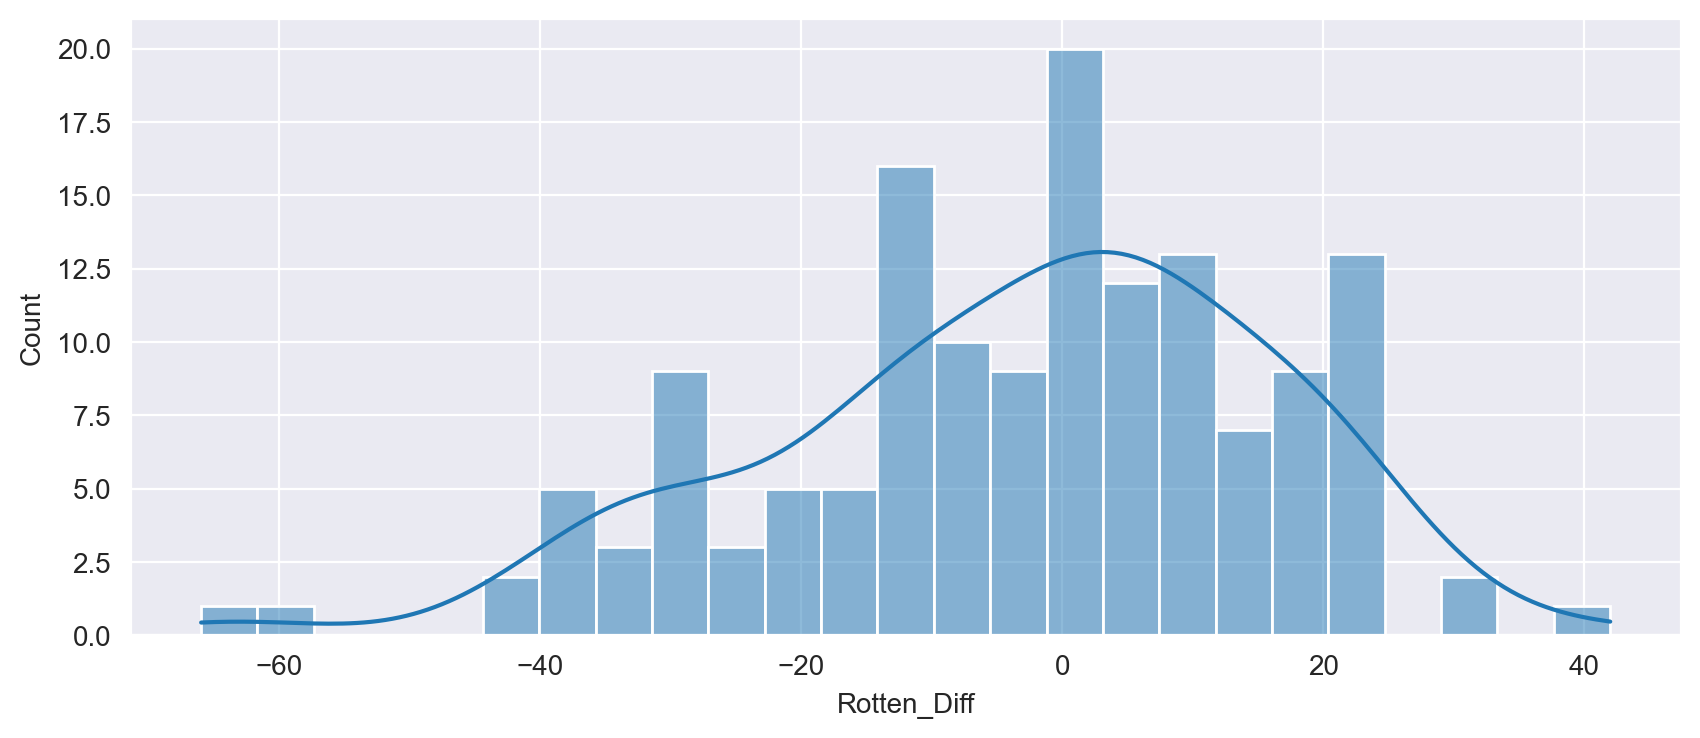

In [44]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites, x="Rotten_Diff",kde=True,bins=25)

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

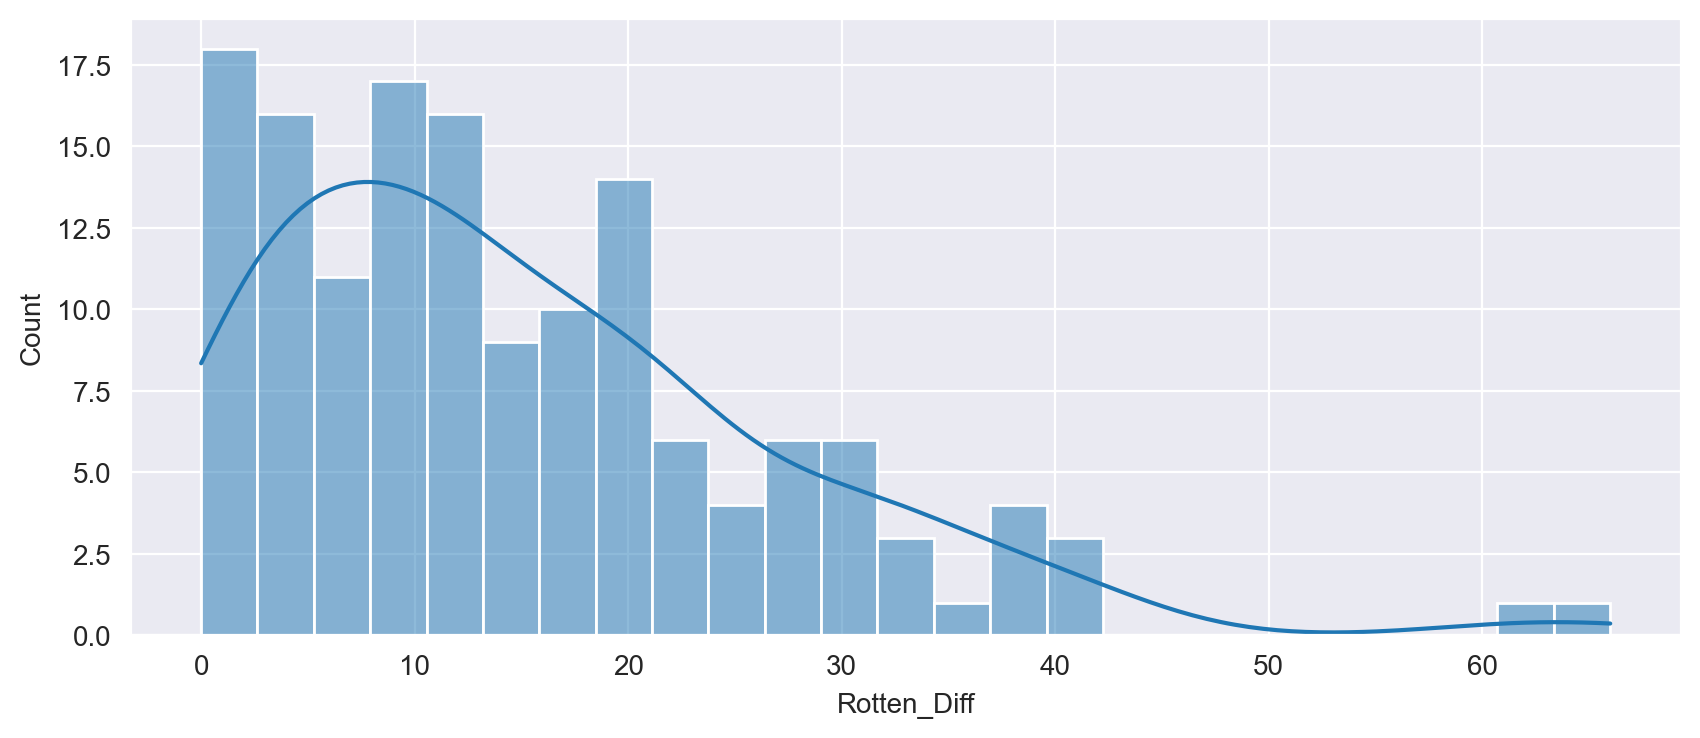

In [47]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites["Rotten_Diff"].apply(abs),kde=True,bins=25)

In [50]:
all_sites.nsmallest(5,"Rotten_Diff")[["FILM","Rotten_Diff"]]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [51]:
all_sites.nlargest(5,"Rotten_Diff")[["FILM","Rotten_Diff"]]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


(0.0, 100.0)

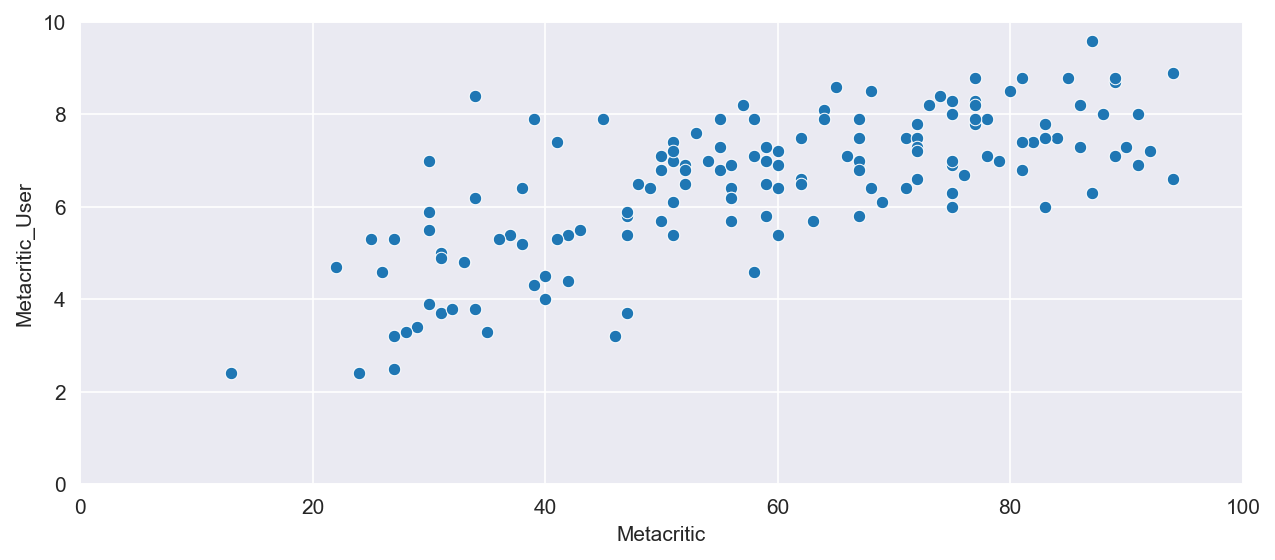

In [52]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

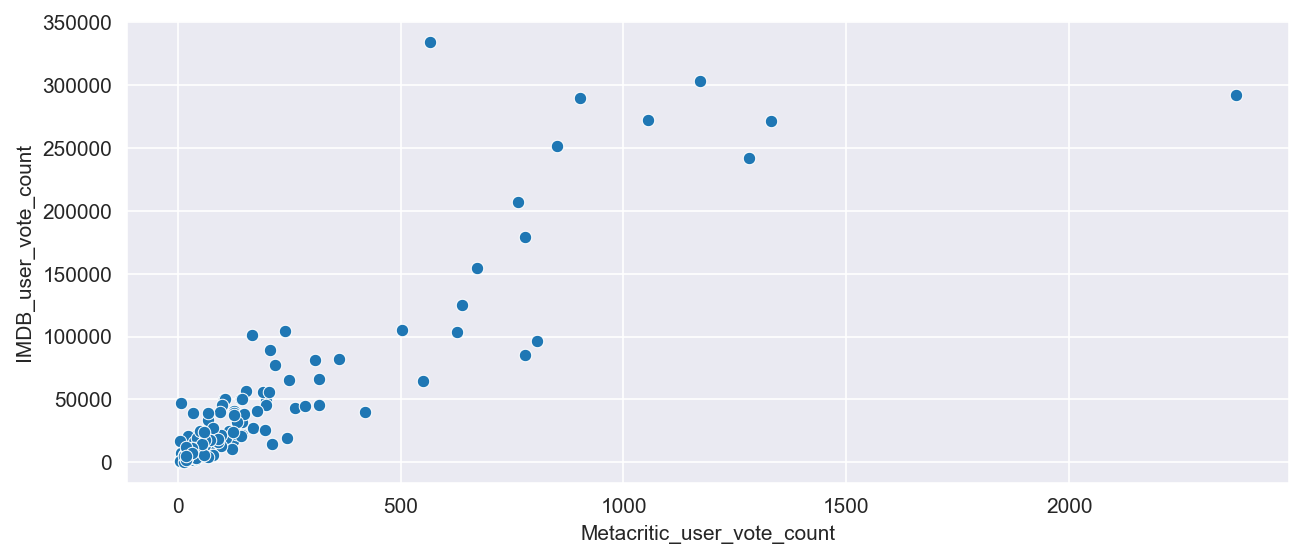

In [53]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

In [54]:
all_sites.nlargest(1,"IMDB_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [55]:
all_sites.nlargest(1,"Metacritic_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9
